<div style="text-align: left;">
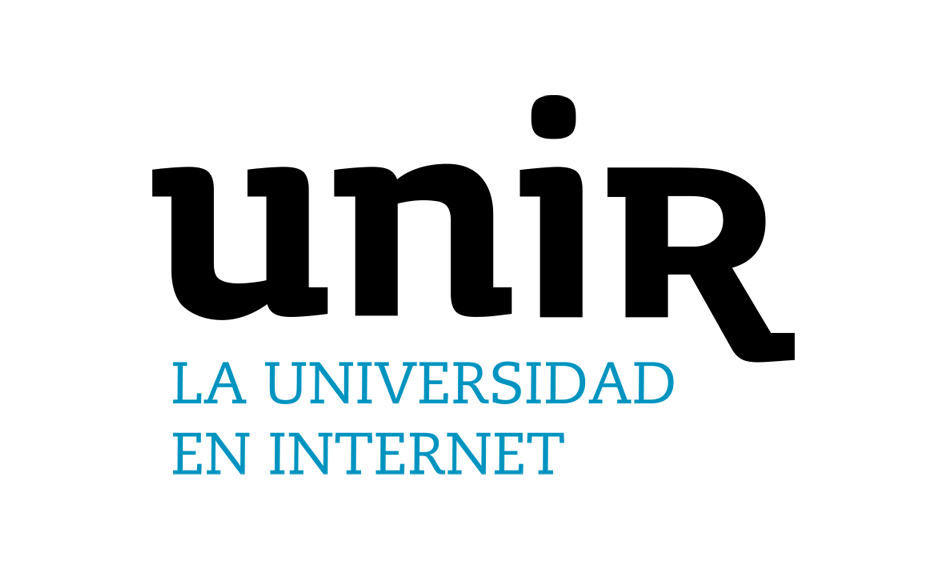
     <div>
        <h1>Simulación Log-Normal</h1>
        <p>Dr. Miguel Angel Navarro Burgos</p>
        <p>Máster Universitario en Ingeniería Matemática y Computación</p>
        <p>Modelización y Valoración de Derivados y Carteras en Finanzas</p>
    </div>
</div>

Recordemos que la solución de la ecuación diferencial estocástica que describe la evolución del precio de un activo en el modelo log-normal es:

$$
S(t) = S_0 e^{(\mu - \frac{1}{2} \sigma^2) t + \sigma W(t)}
$$

donde:

- $S(t)$ es el precio del activo en el tiempo $t$.
- $S_0$ es el precio inicial del activo.
- $\mu$ es la tasa de crecimiento esperada.
- $\sigma$ es la volatilidad.
- $W(t)$ es un proceso de Wiener (movimiento Browniano).


# SImulación proceso de Wiener

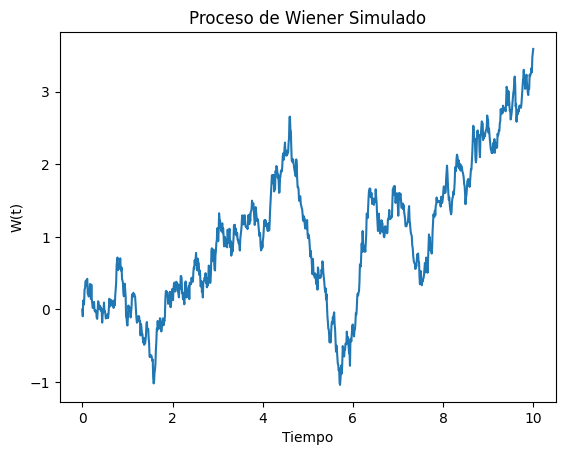

In [33]:

import numpy as np
import matplotlib.pyplot as plt

# Inicializar los valores
num_steps = 1000       # Número de pasos en cada simulación
delta_t = 0.01         # Tamaño del paso de tiempo

t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_values = [0.0]  # Inicialización del proceso de Wiener

# Simular los pasos de tiempo
for _ in range(num_steps - 1):
    # Generar un incremento aleatorio de Wiener
    w_increment = np.sqrt(delta_t) * np.random.normal(0, 1)
    # Calcular el siguiente valor del proceso de Wiener
    w_values.append(w_values[-1] + w_increment)

# Graficar los resultados
plt.plot(t, w_values)
plt.title('Proceso de Wiener Simulado')
plt.xlabel('Tiempo')
plt.ylabel('W(t)')
plt.show()


# Modelo Log-Normal con $\mu$ y $\sigma$ datos dados

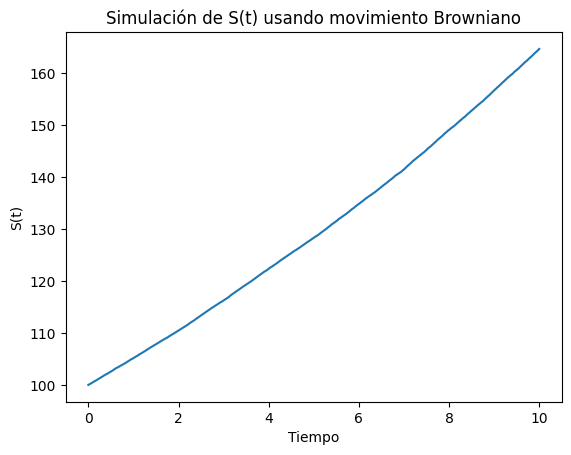

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Inicializar los valores
num_steps = 1000       # Número de pasos en cada simulación
delta_t = 0.01         # Tamaño del paso de tiempo

t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_values = [0.0]  # Inicialización del proceso de Wiener

# Parámetros de S(t)
S0 = 100           # Valor inicial de S
mu = 0.05          # Tasa de retorno
sigma = 0.001      # Volatilidad

# Simular el proceso de Wiener
for _ in range(num_steps - 1):
    # Generar un incremento aleatorio de Wiener
    w_increment = np.sqrt(delta_t) * np.random.normal(0, 1)
    # Calcular el siguiente valor del proceso de Wiener
    w_values.append(w_values[-1] + w_increment)

# Calcular S(t) usando la fórmula
S_values = [S0 * np.exp((mu - 0.5 * sigma**2) * t[i] + sigma * w_values[i]) for i in range(num_steps)]

# Graficar S(t)
plt.plot(t, S_values)
plt.title('Simulación de S(t) usando movimiento Browniano')
plt.xlabel('Tiempo')
plt.ylabel('S(t)')
plt.show()


# Modelo Log-Normal con $\mu$ y $\sigma$ estimados desde un conjunto de datos

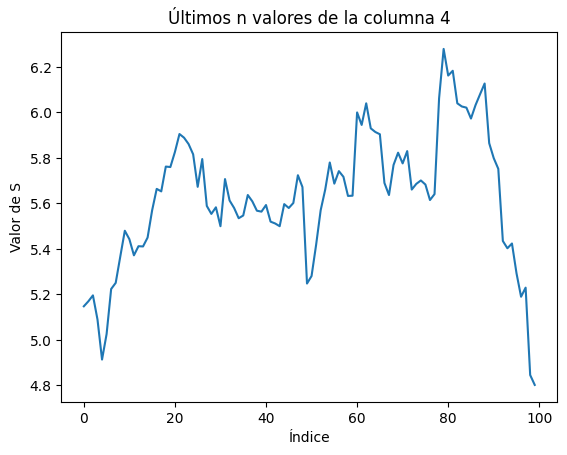

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
n = 100
S = pd.read_csv("datos.csv").iloc[:, 4][-n:].to_numpy() # últimos n datos

# Graficar los datos
plt.plot(S)
plt.title('Últimos n valores de la columna 4')
plt.xlabel('Índice')
plt.ylabel('Valor de S')
plt.show()


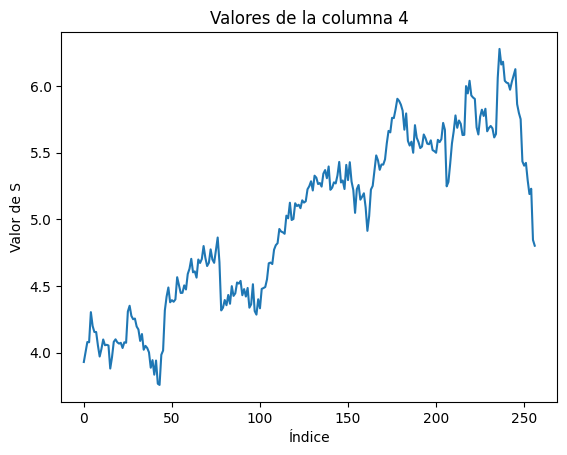

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy() # todos los datos

# Graficar los datos
plt.plot(S)
plt.title('Valores de la columna 4')
plt.xlabel('Índice')
plt.ylabel('Valor de S')
plt.show()


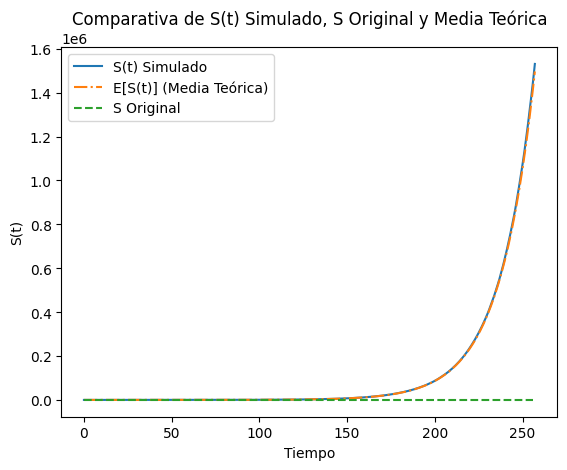

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

# Inicializar los valores
num_steps = len(S)       # Número de pasos en cada simulación (tamaño de S)
delta_t = 1              # Tamaño del paso de tiempo (puedes ajustarlo si es necesario)

# Calcular los retornos logarítmicos
U = np.log(S[1:] / S[:-1])

# Calcular sigma y mu a partir de los retornos logarítmicos
sigmaMME = np.std(U, ddof=1) / np.sqrt(delta_t)
muMMe = (np.mean(U) + sigma**2 / 2) / delta_t

# Simular el proceso de Wiener
t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_values = [0.0]  # Inicialización del proceso de Wiener

for _ in range(num_steps - 1):
    # Generar un incremento aleatorio de Wiener
    w_increment = np.sqrt(delta_t) * np.random.normal(0, 1)
    # Calcular el siguiente valor del proceso de Wiener
    w_values.append(w_values[-1] + w_increment)

# Calcular S(t) usando la fórmula con los valores calculados de mu y sigma
S0 = S[0]  # Valor inicial de S tomado de los datos originales
S_values = [S0 * np.exp((mu - 0.5 * sigma**2) * t[i] + sigma * w_values[i]) for i in range(num_steps)]

# Calcular la media teórica E(S(t)) = S0 * exp(mu * t)
mu_S_values = [S0 * np.exp(mu * t[i]) for i in range(num_steps)]

# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S_values, label='S(t) Simulado')
plt.plot(t, mu_S_values, label='E[S(t)] (Media Teórica)', linestyle='-.')
plt.plot(S, label='S Original', linestyle='--')
plt.title('Comparativa de S(t) Simulado, S Original y Media Teórica')
plt.xlabel('Tiempo')
plt.ylabel('S(t)')
plt.legend()
plt.show()


# Método de Momentos Estadístico

<IPython.core.display.Math object>

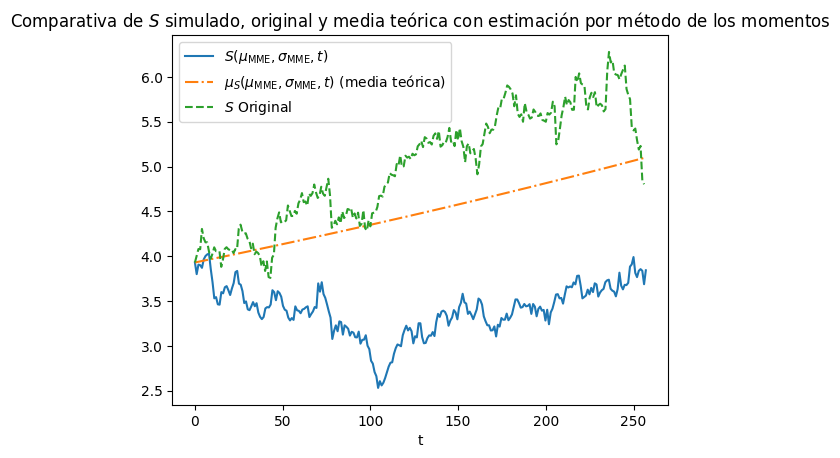

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math

# Habilitar renderizado de texto en LaTeX en matplotlib
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

# Inicializar los valores
num_steps = len(S)       # Número de pasos en cada simulación (tamaño de S)
delta_t = 1              # Tamaño del paso de tiempo

# Calcular los retornos logarítmicos
U = np.log(S[1:] / S[:-1])

# Calcular sigma y mu a partir de los retornos logarítmicos
sigmaMME = np.std(U, ddof=1) / np.sqrt(delta_t)
muMME = (np.mean(U) + sigmaMME**2 / 2) / delta_t

# Mostrar estimaciones
texto = f"\\text{{Los estimadores son: }}\\mu_{{\\text{{MME}}}} = {muMME:0.5f} \\text{{ y }} \\sigma_{{\\text{{MME}}}} = {sigmaMME:0.5f}"
display(Math(texto))

# Simular el proceso de Wiener usando operaciones vectorizadas
t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
w_increments = np.sqrt(delta_t) * np.random.normal(0, 1, num_steps - 1)  # Incrementos del proceso de Wiener
w_values = np.insert(np.cumsum(w_increments), 0, 0)  # Proceso de Wiener acumulado, con 0 inicial

# Calcular S(t) usando la fórmula con los valores calculados de mu y sigma
S0 = S[0]  # Valor inicial de S tomado de los datos originales
S_values_MME = S0 * np.exp((muMME - 0.5 * sigmaMME**2) * t + sigmaMME * w_values)

# Calcular la media teórica E(S(t)) = S0 * exp(muMME * t)
mu_S_values_MME = S0 * np.exp(muMME * t)

# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S_values_MME, label=r'$S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$')
plt.plot(t, mu_S_values_MME, label=r'$\mu_S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$ (media teórica)', linestyle='-.')
plt.plot(S, label=r'$S$ Original', linestyle='--')

# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método de los momentos')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()


# Método de Máxima Verosimilitud

<IPython.core.display.Math object>

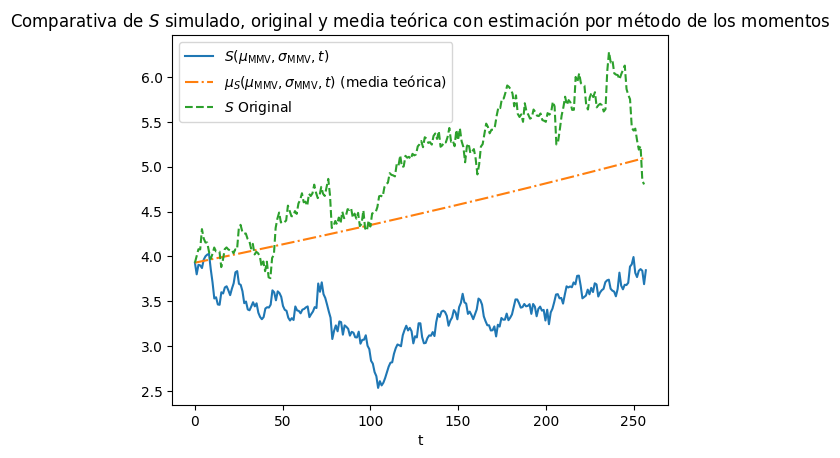

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math


# Habilitar renderizado de texto en LaTeX en matplotlib
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

# Inicializar los valores
num_steps = len(S)       # Número de pasos en cada simulación (tamaño de S)
delta_t = 1              # Tamaño del paso de tiempo

# Calcular los retornos logarítmicos
R = S[1:] / S[:-1] - 1

# Calcular sigma y mu a partir de los retornos logarítmicos
sigmaMMV = np.std(R, ddof=0) / np.sqrt(delta_t)
muMMV = np.mean(R) / delta_t

# Mostrar estimaciones
texto = f"\\text{{Los estimadores son: }}\\mu_{{\\text{{MMV}}}} = {muMMV:0.5f} \\text{{ y }} \\sigma_{{\\text{{MMV}}}} = {sigmaMMV:0.5f}"
display(Math(texto))

# Simular el proceso de Wiener usando operaciones vectorizadas
t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
#w_increments = np.sqrt(delta_t) * np.random.normal(0, 1, num_steps - 1)  # Incrementos del proceso de Wiener
#w_values = np.insert(np.cumsum(w_increments), 0, 0)  # Proceso de Wiener acumulado, con 0 inicial

# Calcular S(t) usando la fórmula con los valores calculados de mu y sigma
S0 = S[0]  # Valor inicial de S tomado de los datos originales
S_values_MMV = S0 * np.exp((muMMV - 0.5 * sigmaMMV**2) * t + sigmaMMV * w_values)

# Calcular la media teórica E(S(t)) = S0 * exp(mu * t)
mu_S_values_MMV = S0 * np.exp(muMMV * t)

# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S_values_MMV, label=r'$S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$')
plt.plot(t, mu_S_values_MMV, label=r'$\mu_S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$ (media teórica)', linestyle='-.')
plt.plot(S, label=r'$S$ Original', linestyle='--')

# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método de los momentos')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()


# Método de momentos no paramétrico

<IPython.core.display.Math object>

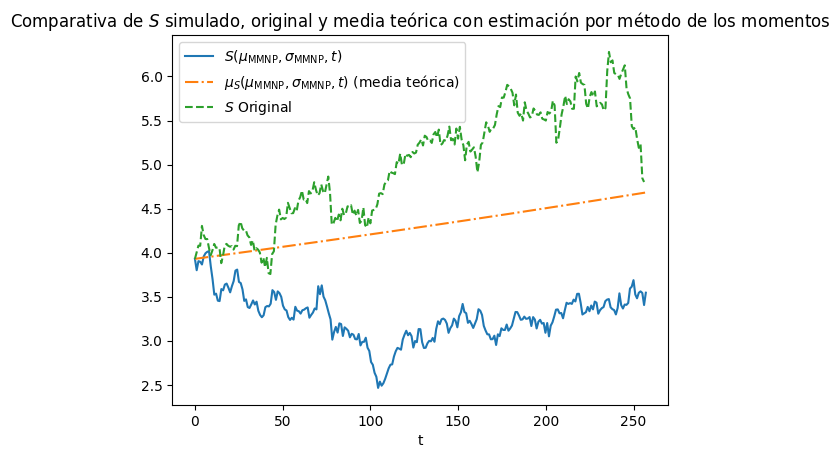

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math


# Habilitar renderizado de texto en LaTeX en matplotlib
#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

# Inicializar los valores
num_steps = len(S)       # Número de pasos en cada simulación (tamaño de S)
delta_t = 1              # Tamaño del paso de tiempo

# Calcular diferncias
R = S[1:] - S[:-1]

# Calcular sigma y mu a partir de los retornos logarítmicos
muMMNP = 1 / delta_t * (np.sum(R) / np.sum(S[:-1]))
sigmaMMNP = np.sqrt(1 / np.sqrt(delta_t)*(np.sum(R**2)/np.sum(S[:-1]**2)))

# Mostrar estimaciones
texto = f"\\text{{Los estimadores son: }}\\mu_{{\\text{{MMNP}}}} = {muMMNP:0.5f} \\text{{ y }} \\sigma_{{\\text{{MMNP}}}} = {sigmaMMNP:0.5f}"
display(Math(texto))

# Simular el proceso de Wiener usando operaciones vectorizadas
t = np.linspace(0, num_steps * delta_t, num_steps)  # Vector de tiempo
#w_increments = np.sqrt(delta_t) * np.random.normal(0, 1, num_steps - 1)  # Incrementos del proceso de Wiener
#w_values = np.insert(np.cumsum(w_increments), 0, 0)  # Proceso de Wiener acumulado, con 0 inicial

# Calcular S(t) usando la fórmula con los valores calculados de mu y sigma
S0 = S[0]  # Valor inicial de S tomado de los datos originales
S_values_MMNP = S0 * np.exp((muMMNP - 0.5 * sigmaMMNP**2) * t + sigmaMMNP * w_values)

# Calcular la media teórica E(S(t)) = S0 * exp(mu * t)
mu_S_values_MMNP = S0 * np.exp(muMMNP * t)

# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S_values_MMNP, label=r'$S\left(\mu_{\text{MMNP}},\sigma_{\text{MMNP}},t\right)$')
plt.plot(t, mu_S_values_MMNP, label=r'$\mu_S\left(\mu_{\text{MMNP}},\sigma_{\text{MMNP}},t\right)$ (media teórica)', linestyle='-.')
plt.plot(S, label=r'$S$ Original', linestyle='--')

# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método de los momentos')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()


# Comparativa entre Método de los momentos, máxima verosimilitud y momentos no paramétrico

# Con Wiener

<IPython.core.display.Math object>

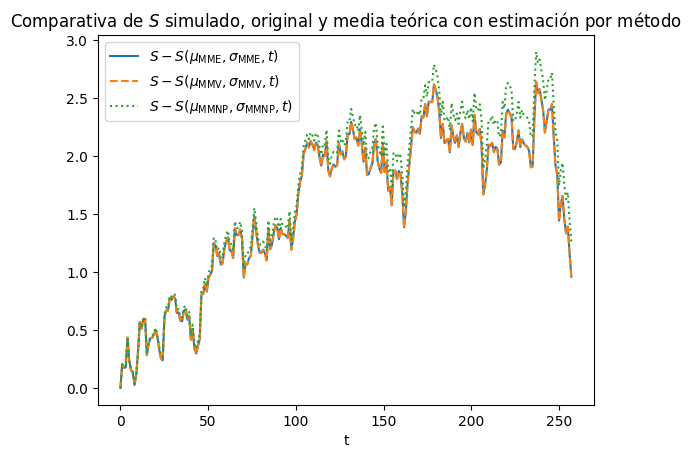

In [41]:
# Graficar S(t) simulado, los datos originales y la media teórica
plt.plot(t, S-S_values_MME, label=r'$S-S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$', linestyle='-')
plt.plot(t, S-S_values_MMV, label=r'$S-S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$', linestyle= '--')
plt.plot(t, S-S_values_MMNP, label=r'$S-S\left(\mu_{\text{MMNP}},\sigma_{\text{MMNP}},t\right)$', linestyle=':')

# Mostrar errores estimaciones
texto =  f"\\text{{Los errores de las estimaciones son: }} \\; |S - S(\\mu_{{\\text{{MME}}}}, \\sigma_{{\\text{{MME}}}}, t)| = {np.linalg.norm(S-S_values_MME):0.5f}, |S - S(\\mu_{{\\text{{MMV}}}}, \\sigma_{{\\text{{MMV}}}}, t)| = {np.linalg.norm(S-S_values_MMV):0.5f} \\text{{ y }} |S - S(\\mu_{{\\text{{MMNP}}}}, \\sigma_{{\\text{{MMNP}}}}, t)| = {np.linalg.norm(S-S_values_MMNP):0.5f}"
display(Math(texto))


# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()

# Medias teóricas

<IPython.core.display.Math object>

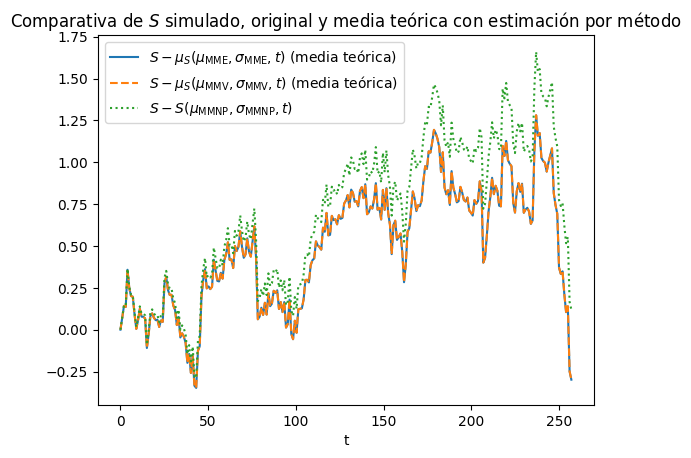

In [42]:
# Graficar S(t) simulado, los datos originales y la media teórica
#plt.plot(t, S_values_MME-S_values_MMV, label=r'$S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$')
plt.plot(t, S-mu_S_values_MME, label=r'$S-\mu_S\left(\mu_{\text{MME}},\sigma_{\text{MME}},t\right)$ (media teórica)', linestyle='-')
plt.plot(t, S-mu_S_values_MMV, label=r'$S-\mu_S\left(\mu_{\text{MMV}},\sigma_{\text{MMV}},t\right)$ (media teórica)', linestyle='--')
plt.plot(t, S-mu_S_values_MMNP, label=r'$S-S\left(\mu_{\text{MMNP}},\sigma_{\text{MMNP}},t\right)$', linestyle=':')

# Mostrar errores estimaciones
texto =  f"\\text{{Los errores de las estimaciones son: }} \\; |S - \\mu_S(\\mu_{{\\text{{MME}}}}, \\sigma_{{\\text{{MME}}}}, t)| = {np.linalg.norm(S-mu_S_values_MME):0.5f}, |S - \\mu_S(\\mu_{{\\text{{MMV}}}}, \\sigma_{{\\text{{MMV}}}}, t)| = {np.linalg.norm(S-mu_S_values_MMV):0.5f} \\text{{ y }} |S - \\mu_S(\\mu_{{\\text{{MMNP}}}}, \\sigma_{{\\text{{MMNP}}}}, t)| = {np.linalg.norm(S-mu_S_values_MMNP):0.5f}"
display(Math(texto))

# Configurar título y etiquetas en formato LaTeX
plt.title(r'Comparativa de $S$ simulado, original y media teórica con estimación por método')
plt.xlabel(r't')
#plt.ylabel(r'$S(t)$')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()

# Validación del Modelo

# ECM y EPAM con Wiener

In [43]:
import numpy as np

# Método de momentos
ECM_MME=np.sqrt(np.sum((S-S_values_MME)**2))
EPAM_MME = 100*np.mean(abs(1-S_values_MME/S))

# Método de máxima verosimilitud
ECM_MMV=np.sqrt(np.sum((S-S_values_MMV)**2))
EPAM_MMV = 100*np.mean(abs(1-S_values_MMV/S))

# Método de momentos no paramétrico
ECM_MMNP=np.sqrt(np.sum((S-S_values_MMNP)**2))
EPAM_MMNP = 100*np.mean(abs(1-S_values_MMNP/S))


# Resultados
print(f'ECM_MME={ECM_MME:.5f} y EPAMMME(%)={EPAM_MME:.3f}%')
print(f'ECM_MMV={ECM_MMV:.5f} y EPAMMMV(%)={EPAM_MMV:.3f}%')
print(f'ECM_MMNP={ECM_MMNP:.5f} y EPAMMMNP(%)={EPAM_MMNP:.3f}%')

ECM_MME=27.69927 y EPAMMME(%)=30.660%
ECM_MMV=27.65656 y EPAMMMV(%)=30.609%
ECM_MMNP=29.99121 y EPAMMMNP(%)=33.061%


# ECM y EPAM medias teóricas

In [44]:
import numpy as np

# Método de momentos
ECM_MME_mu=np.sqrt(np.sum((S-mu_S_values_MME)**2))
EPAM_MME_mu = 100*np.mean(abs(1-mu_S_values_MME/S))

# Método de máxima verosimilitud
ECM_MMV_mu=np.sqrt(np.sum((S-mu_S_values_MMV)**2))
EPAM_MMV_mu = 100*np.mean(abs(1-mu_S_values_MMV/S))

# Método de momentos no paramétrico
ECM_MMNP_mu=np.sqrt(np.sum((S-mu_S_values_MMNP)**2))
EPAM_MMNP_mu = 100*np.mean(abs(1-mu_S_values_MMNP/S))


# Resultados
print(f'ECM_MME_mu={ECM_MME_mu:.5f} y EPAMMME(%)={EPAM_MME_mu:.3f}%')
print(f'ECM_MMV_mu={ECM_MMV_mu:.5f} y EPAMMMV(%)={EPAM_MMV_mu:.3f}%')
print(f'ECM_MMNP_mu={ECM_MMNP_mu:.5f} y EPAMMMNP(%)={EPAM_MMNP_mu:.3f}%')

ECM_MME_mu=9.92341 y EPAMMME(%)=9.871%
ECM_MMV_mu=9.93085 y EPAMMMV(%)=9.878%
ECM_MMNP_mu=13.34374 y EPAMMMNP(%)=13.301%


# Intevalos de confianza

# Media y varianza teóricas

In [45]:
#mu_S(t) de Log-Normal
def ELN(t,mu,s0):
    return s0*np.exp(mu*t)

#sigma^2_S(t) de Log-Normal
def VLN(t,mu,sigma,s0):
    return s0**2*np.exp(2*mu*t)*(np.exp(sigma**2*t)-1)

# IC 95% MME, MV, MMNP con media y varianza teórica

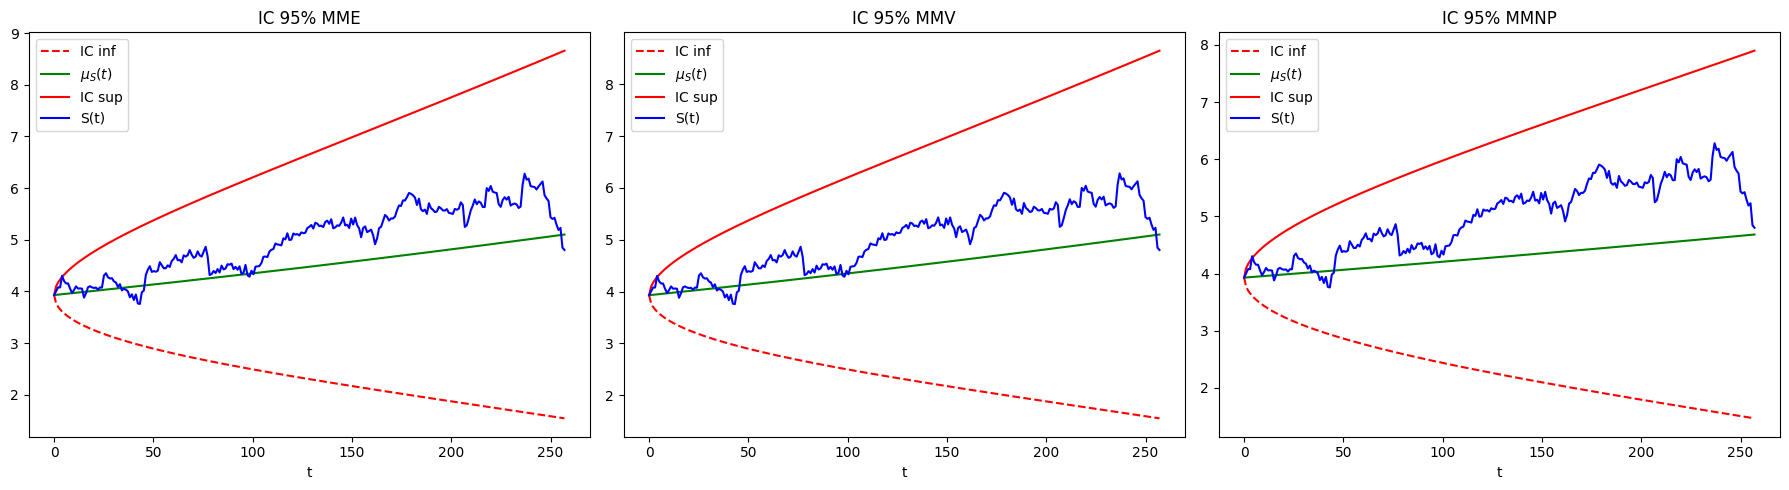

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Supón que las funciones ELN y VLN, y las variables t, S, muMME, sigmaMME, etc., están definidas

# Crear la figura y los ejes para las tres subtramas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico para IC 95% MME
ELNMME = ELN(t, muMME, S[0])
SMME = np.sqrt(VLN(t, muMME, sigmaMME, S[0]))
axs[0].plot(t, ELNMME - 1.96 * SMME, '--r', label='IC inf')
axs[0].plot(t, ELNMME, 'g', label=r'$\mu_S(t)$')
axs[0].plot(t, ELNMME + 1.96 * SMME, 'r', label='IC sup')
axs[0].plot(t, S, 'b', label='S(t)')
axs[0].set_xlabel('t')
axs[0].set_title(r'IC 95% MME')
axs[0].legend()

# Gráfico para IC 95% MMV
ELNMMV = ELN(t, muMMV, S[0])
SMMV = np.sqrt(VLN(t, muMMV, sigmaMMV, S[0]))
axs[1].plot(t, ELNMMV - 1.96 * SMMV, '--r', label='IC inf')
axs[1].plot(t, ELNMMV, 'g', label=r'$\mu_S(t)$')
axs[1].plot(t, ELNMMV + 1.96 * SMMV, 'r', label='IC sup')
axs[1].plot(t, S, 'b', label='S(t)')
axs[1].set_xlabel('t')
axs[1].set_title(r'IC 95% MMV')
axs[1].legend()

# Gráfico para IC 95% MMNP
ELNMMNP = ELN(t, muMMNP, S[0])
SMMNP = np.sqrt(VLN(t, muMMNP, sigmaMMNP, S[0]))
axs[2].plot(t, ELNMMNP - 1.96 * SMMNP, '--r', label='IC inf')
axs[2].plot(t, ELNMMNP, 'g', label=r'$\mu_S(t)$')
axs[2].plot(t, ELNMMNP + 1.96 * SMMNP, 'r', label='IC sup')
axs[2].plot(t, S, 'b', label='S(t)')
axs[2].set_xlabel('t')
axs[2].set_title(r'IC 95% MMNP')
axs[2].legend()

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()


# Seguna opción

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Leer el archivo CSV y seleccionar la columna 4
S = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

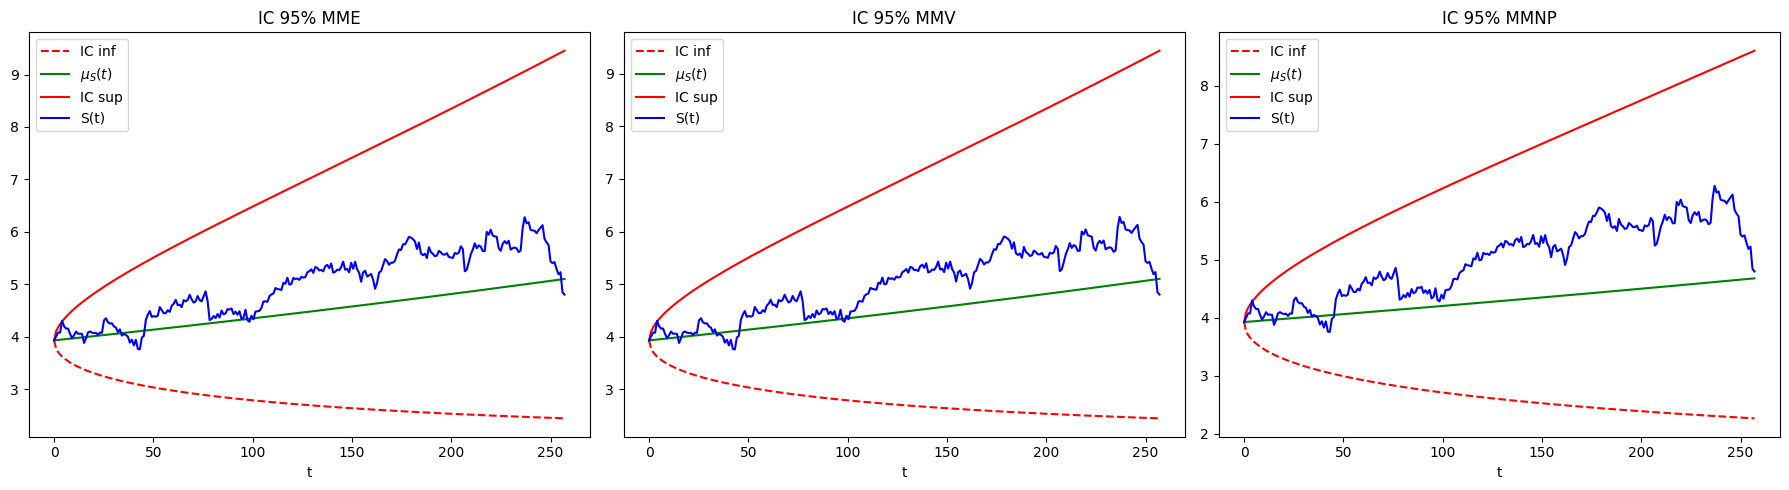

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Supón que las funciones ELN y VLN, y las variables t, S, Sa, muMME, sigmaMME, etc., están definidas

# Crear la figura y los ejes para las tres subtramas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico para IC 95% MME
ELNMME = ELN(t, muMME, S[0])
axs[0].plot(t, S[0] * np.exp((muMME - 0.5 * sigmaMME**2) * t - 1.96 * sigmaMME * np.sqrt(t)), '--r', label='IC inf')
axs[0].plot(t, ELNMME, 'g', label=r'$\mu_S(t)$')
axs[0].plot(t, S[0] * np.exp((muMME - 0.5 * sigmaMME**2) * t + 1.96 * sigmaMME * np.sqrt(t)), 'r', label='IC sup')
axs[0].plot(t, S, 'b', label='S(t)')
axs[0].set_xlabel('t')
axs[0].set_title(r'IC 95% MME')
axs[0].legend()

# Gráfico para IC 95% MMV
ELNMMV = ELN(t, muMMV, S[0])
axs[1].plot(t, S[0] * np.exp((muMMV - 0.5 * sigmaMMV**2) * t - 1.96 * sigmaMMV * np.sqrt(t)), '--r', label='IC inf')
axs[1].plot(t, ELNMMV, 'g', label=r'$\mu_S(t)$')
axs[1].plot(t, S[0] * np.exp((muMMV - 0.5 * sigmaMMV**2) * t + 1.96 * sigmaMMV * np.sqrt(t)), 'r', label='IC sup')
axs[1].plot(t, S, 'b', label='S(t)')
axs[1].set_xlabel('t')
axs[1].set_title(r'IC 95% MMV')
axs[1].legend()

# Gráfico para IC 95% MMNP
ELNMMNP = ELN(t, muMMNP, S[0])
axs[2].plot(t, S[0] * np.exp((muMMNP - 0.5 * sigmaMMNP**2) * t - 1.96 * sigmaMMNP * np.sqrt(t)), '--r', label='IC inf')
axs[2].plot(t, ELNMMNP, 'g', label=r'$\mu_S(t)$')
axs[2].plot(t, S[0] * np.exp((muMMNP - 0.5 * sigmaMMNP**2) * t + 1.96 * sigmaMMNP * np.sqrt(t)), 'r', label='IC sup')
axs[2].plot(t, S, 'b', label='S(t)')
axs[2].set_xlabel('t')
axs[2].set_title(r'IC 95% MMNP')
axs[2].legend()

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()


# Estimaciones a partir de la mitad de la muestra con $\Delta t=1$

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Leer el archivo CSV y seleccionar la columna 4
Sa = pd.read_csv("datos.csv").iloc[:, 4].to_numpy()

In [50]:
#modelo Log-Normal
def St(t, mu, sigma, s0, w):
    return s0*np.exp((mu-sigma**2/2)*t+sigma*w)

In [51]:
import numpy as np

# Longitud de S y seleccionar una cuarta parte
m = len(Sa) // 4
S = Sa[:m]

# Calcular ratios R
R = S[1:] / S[:-1]

# Estimadores MME
U = np.log(R)
sigmaMME = np.std(U, ddof=1)  # ddof=1 para corregir el sesgo en la varianza muestral
muMME = np.mean(U) + sigmaMME**2 / 2

# Estimadores MMV
R -= 1  # Ajustar R para el cálculo de momentos de variación
muMMV = np.mean(R)
sigmaMMV = np.std(R, ddof=0)  # ddof=0 para el cálculo poblacional

# Estimadores MMNP
R = S[1:] - S[:-1]  # Diferencias absolutas
muMMNP = np.sum(R) / np.sum(S[:-1])
sigmaMMNP = np.sqrt(np.sum(R**2) / np.sum(S[:-1]**2))

# Mostrar los resultados
print(f'muMME={muMME:0.5f} y sigmaMME={sigmaMME:0.5f}')
print(f'muMMV={muMMV:0.5f} y sigmaMMV={sigmaMMV:0.5f}')
print(f'muMMNP={muMMNP:0.5f} y sigmaMMNP={sigmaMMNP:0.5f}')


muMME=0.00280 y sigmaMME=0.02292
muMMV=0.00280 y sigmaMMV=0.02299
muMMNP=0.00258 y sigmaMMNP=0.02256


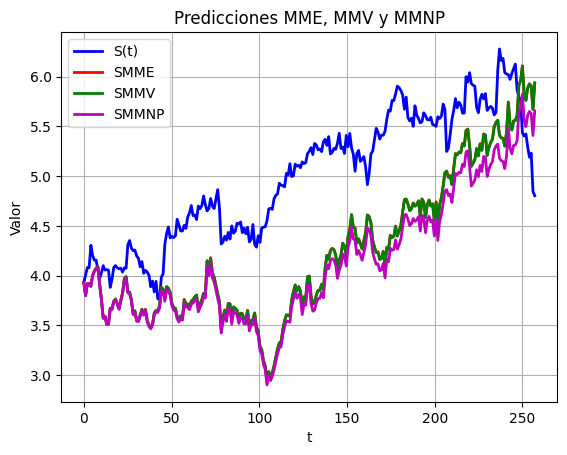

Errores de la estimación ||S-SMME|| = 1.43e+01, ||S-SMMV|| = 1.44e+01 y ||S-SMMNP|| = 1.56e+01


In [52]:
# Estimación MME
SMME = St(t, muMME, sigmaMME, S[0], w_values)

# Estimación MMV
SMMV = St(t, muMMV, sigmaMMV, S[0], w_values)

# Estimación MMNP
SMMNP = St(t, muMMNP, sigmaMMNP, S[0], w_values)

# Crear el gráfico
plt.plot(t, Sa, 'b', label='S(t)', linewidth=2)
plt.plot(t, SMME, 'r', label='SMME', linewidth=2)
plt.plot(t, SMMV, 'g', label='SMMV', linewidth=2)
plt.plot(t, SMMNP, 'm', label='SMMNP', linewidth=2)
plt.xlabel('t')
plt.ylabel('Valor')
plt.title('Predicciones MME, MMV y MMNP')
plt.legend()
plt.grid(True)
plt.show()

print(f'Errores de la estimación ||S-SMME|| = {np.linalg.norm(Sa - SMME):.2e}, '
      f'||S-SMMV|| = {np.linalg.norm(Sa - SMMV):.2e} y '
      f'||S-SMMNP|| = {np.linalg.norm(Sa - SMMNP):.2e}')


# Estimación con la media

In [53]:
#modelo Log-Normal
def mu_St(t, mu, sigma, s0):
    return s0*np.exp(mu*t)

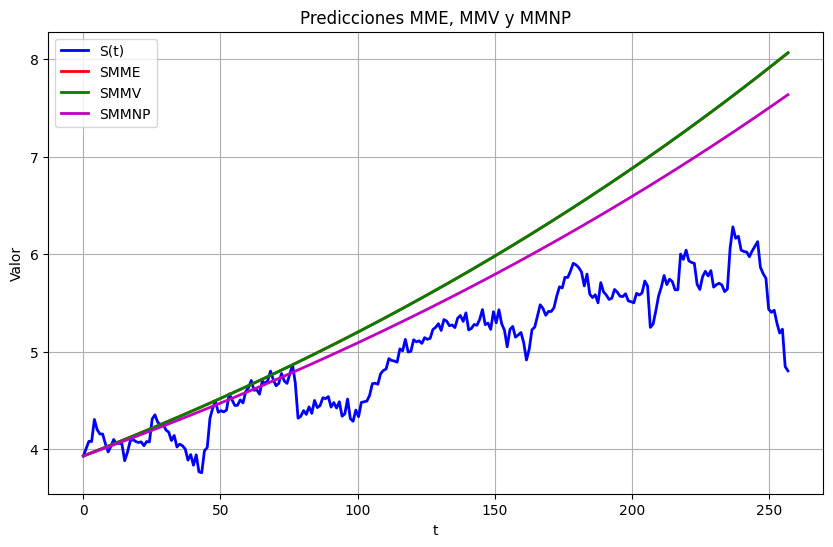

Errores de la estimación ||S - SMME|| = 1.61e+01, ||S - SMMV|| = 1.62e+01, ||S - SMMNP|| = 1.29e+01


In [54]:
# Estimación MME
SMME = mu_St(t, muMME, sigmaMME, S[0])

# Estimación MMV
SMMV = mu_St(t, muMMV, sigmaMMV, S[0])

# Estimación MMNP
SMMNP = mu_St(t, muMMNP, sigmaMMNP, S[0])

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, Sa, 'b', label='S(t)', linewidth=2)
plt.plot(t, SMME, 'r', label='SMME', linewidth=2)
plt.plot(t, SMMV, 'g', label='SMMV', linewidth=2)
plt.plot(t, SMMNP, 'm', label='SMMNP', linewidth=2)
plt.xlabel('t')
plt.ylabel('Valor')
plt.title('Predicciones MME, MMV y MMNP')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los errores de estimación
print(f'Errores de la estimación ||S - SMME|| = {np.linalg.norm(Sa - SMME):.2e}, '
      f'||S - SMMV|| = {np.linalg.norm(Sa - SMMV):.2e}, '
      f'||S - SMMNP|| = {np.linalg.norm(Sa - SMMNP):.2e}')
